In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ast import literal_eval

1. **Exploratory Analysis**  
Begin by understanding your dataset as a whole. Look for trends, outliers, and relationships.  

    Examples of questions to explore:  
    * How popular is each genre over the last decade?
    * How do budget and revenue vary by year or by genre?  
    * What is the average profit margin (revenue - budget) across genres or years?  
    * How do movie ratings (vote average) relate to box-office performance?  
    * Adjust all financial metrics (budget and revenue) for inflation to 2024 dollars using CPI data.

    Deliverables:  
    * At least 3-4 clearly labeled visualizations (bar charts, scatter plots, or boxplots).  

> ## Exploratory Data Analysis (EDA)
>
> 
> In this section we begin examining our collected movie dataset to uncover meaningful patterns and trends in our data. The goal of the explanatory analysis phase is to generate insights, identify relationships between variables and prepare data for statistical analysis and further exploration. This segment of the project will focus on gathered data to create **tools and visualizations.** These will aid us in exploratory and explanatory analasis.
>
> 

In [2]:
# read csv files 
movies_2015_2024 = pd.read_csv("../data/movies_2015_2024.csv")
movies_2015_2024.head(2)

,title,vote_average,vote_count,budget,revenue,imdb_id,id,movie_genres,release_year
0,#Alive,7.227,1955,6300000,13416285,tt10620868,614696,"['Action', 'Horror', 'Science Fiction']",2020
1,10 Cloverfield Lane,6.994,8359,15000000,110216998,tt1179933,333371,"['Thriller', 'Science Fiction', 'Drama', 'Horr...",2016


In [3]:
# create copy of original data
movies_2015_2024_copy = movies_2015_2024.copy()
movies_2015_2024_copy.head(2)

,title,vote_average,vote_count,budget,revenue,imdb_id,id,movie_genres,release_year
0,#Alive,7.227,1955,6300000,13416285,tt10620868,614696,"['Action', 'Horror', 'Science Fiction']",2020
1,10 Cloverfield Lane,6.994,8359,15000000,110216998,tt1179933,333371,"['Thriller', 'Science Fiction', 'Drama', 'Horr...",2016


In [4]:
# adjust genre list for explode
movies_2015_2024_copy['movie_genres'] = movies_2015_2024_copy['movie_genres'].apply(literal_eval)

# expand each list of geners into seperate rows
movies_2015_2024_explode = movies_2015_2024_copy.explode('movie_genres')
movies_2015_2024_explode.head(2)

,title,vote_average,vote_count,budget,revenue,imdb_id,id,movie_genres,release_year
0,#Alive,7.227,1955,6300000,13416285,tt10620868,614696,Action,2020
0,#Alive,7.227,1955,6300000,13416285,tt10620868,614696,Horror,2020


1.How popular is each genre over the last decade?

> ## Genre Popularity
>
> 
> Here we are going to give an acurate depiction of the popularity of each genre. Below we create a **grouped table.** This table contains movie genres, vote count and release year. This enables us to measure popularity of genre based on vote count. Here is what we can observe from the scatterplot below.
>
> 
>* **Action and adventure** movies consistently dominate overall vote count.
>* Most of the other genres are **clustered in the mid range.**
>* **Niche genres** like western, war and music movies have **lower vote count.**

In [5]:
# group reltive genre data for visualization
genre_popularity = movies_2015_2024_explode.groupby(['movie_genres','release_year'])['vote_count'].sum().reset_index()

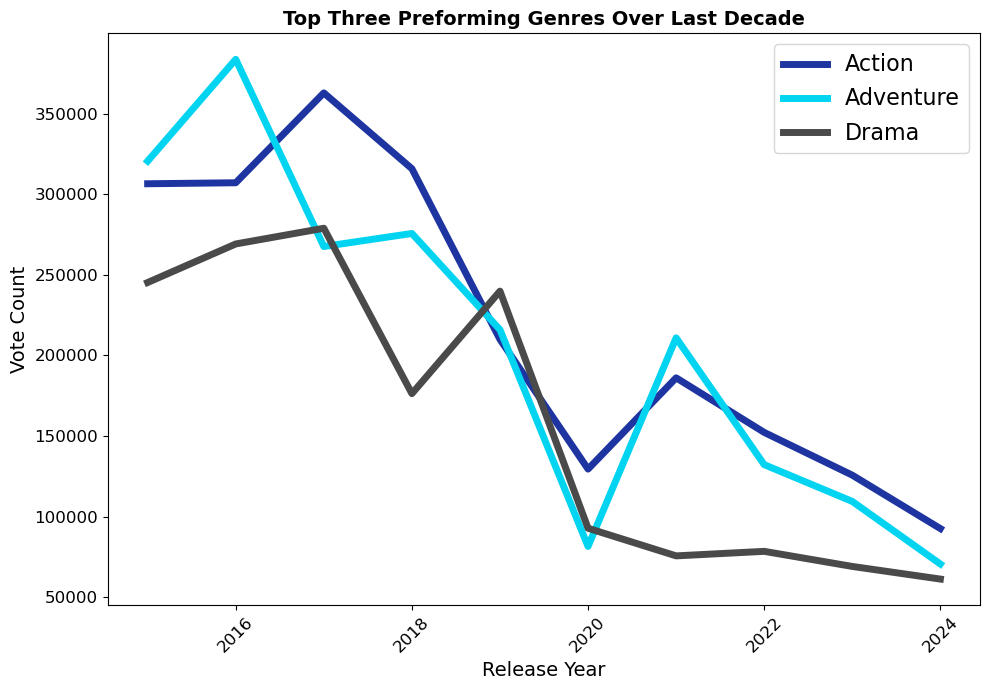

In [6]:
# import colors from powerpoint
dark_blue = "#1e35a1"
light_blue = "#00d4f0"
slate_gray = "#4a4a4a"

# get top geners by total vote count
top_genres = (
    genre_popularity.groupby("movie_genres")["vote_count"]
    .sum()
    .sort_values(ascending=False)
    .head(3)       
    .index
)
filtered_geners = genre_popularity[genre_popularity["movie_genres"].isin(top_genres)]
plt.figure(figsize = (10,7))

# create lineplot to compare popular genre each year
sns.lineplot(data = filtered_geners, x= 'release_year', 
             y = 'vote_count', 
             hue='movie_genres', 
             linewidth=5,
            palette=[dark_blue, light_blue, slate_gray]
            )

plt.title("Top Three Preforming Genres Over Last Decade",
          fontsize=14,
          fontweight = 'bold'
         )
plt.ylabel("Vote Count",fontsize=14)
plt.xlabel("Release Year",fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1, 1),loc = 'upper right', fontsize=16)
plt.tight_layout()
plt.savefig('../assets/Top Three Preforming Genres Over Last Decade.png', dpi = 150);
plt.show();

> ## Evaluate Budget and Revenue by Year
>
> Below we create a bar chart to show the difference in **budget and revenue** from year to year. We use a groupby to collect release year, budget and revenue data. After this we melt our data to create a new column containg budget and revenue. This enables us to create a simple visualization where we see the difference between budget and revenue side by side.
> 
>* **Melt data** to create "type" column.
>* Plot barchart with budget and revenue.
>* Repeat process and groupby **genre instead of year.**

In [7]:
# group by release year and calculate average budget and revenue 
year_summary = movies_2015_2024.groupby('release_year')[['budget','revenue']].mean().reset_index()
year_summary.head(2)

,release_year,budget,revenue
0,2015,63171100.0,2.432265e+08
1,2016,70173750.0,2.593896e+08


In [8]:
# melt data into long format
year_long = year_summary.melt(
    id_vars="release_year",
    value_vars=["budget", "revenue"],
    var_name="type",
    value_name="amount"
)
year_long.head(2)

,release_year,type,amount
0,2015,budget,63171100.0
1,2016,budget,70173750.0


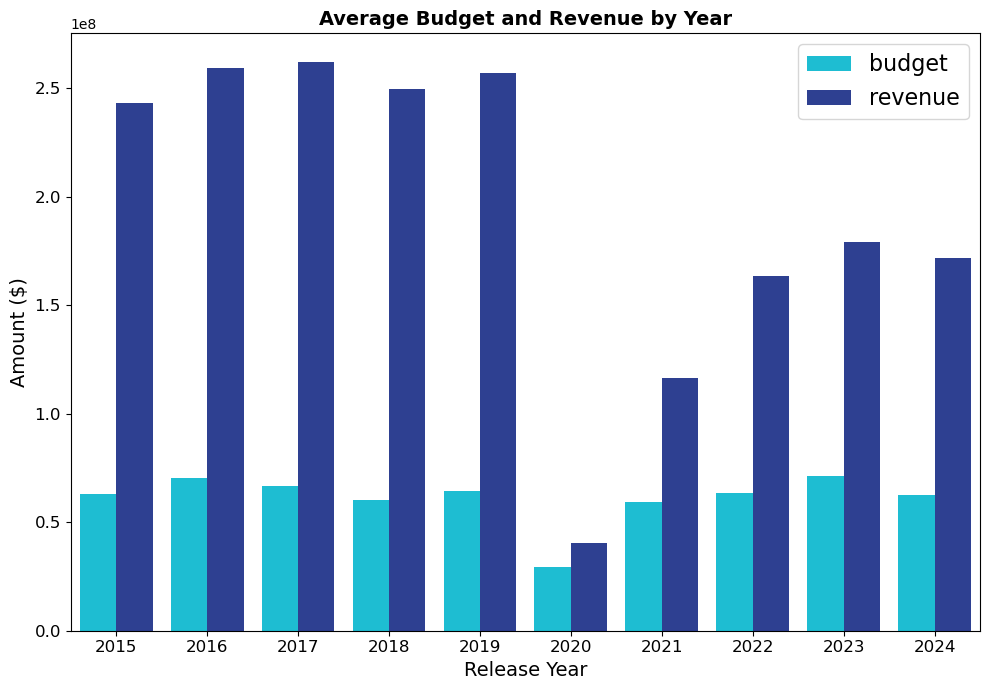

In [9]:
# import colors from powerpoint
dark_blue = "#1e35a1"
light_blue = "#00d4f0"

# create barcharts to compare avg budget and revenue by year
plt.figure(figsize=(10,7))
sns.barplot(data=year_long, x='release_year', y='amount',hue='type',palette={"budget": light_blue, "revenue": dark_blue} )

# label visualization
plt.title("Average Budget and Revenue by Year", fontsize= 14,fontweight = 'bold')
plt.ylabel("Amount ($)",fontsize= 14)
plt.xlabel("Release Year",fontsize= 14)
plt.xticks(rotation=0,fontsize= 12)
plt.yticks(fontsize= 12)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('../assets/Average Budget and Revenue by Year', dpi = 150);
plt.show()

In [10]:
# group by movie genres and calculate avg budget and revenue 
genre_summary = movies_2015_2024_explode.groupby('movie_genres')[['budget','revenue']].mean().sort_values('revenue').reset_index()
genre_summary.tail(2)

,movie_genres,budget,revenue
17,Family,1.006041e+08,3.792222e+08
18,Adventure,1.186560e+08,3.837186e+08


In [11]:
# melt data to long format
genre_names = genre_summary.melt(
    id_vars="movie_genres",
    value_vars=["budget", "revenue"],
    var_name="type",
    value_name="amount"
)
genre_names.tail(2)

,movie_genres,type,amount
36,Family,revenue,3.792222e+08
37,Adventure,revenue,3.837186e+08


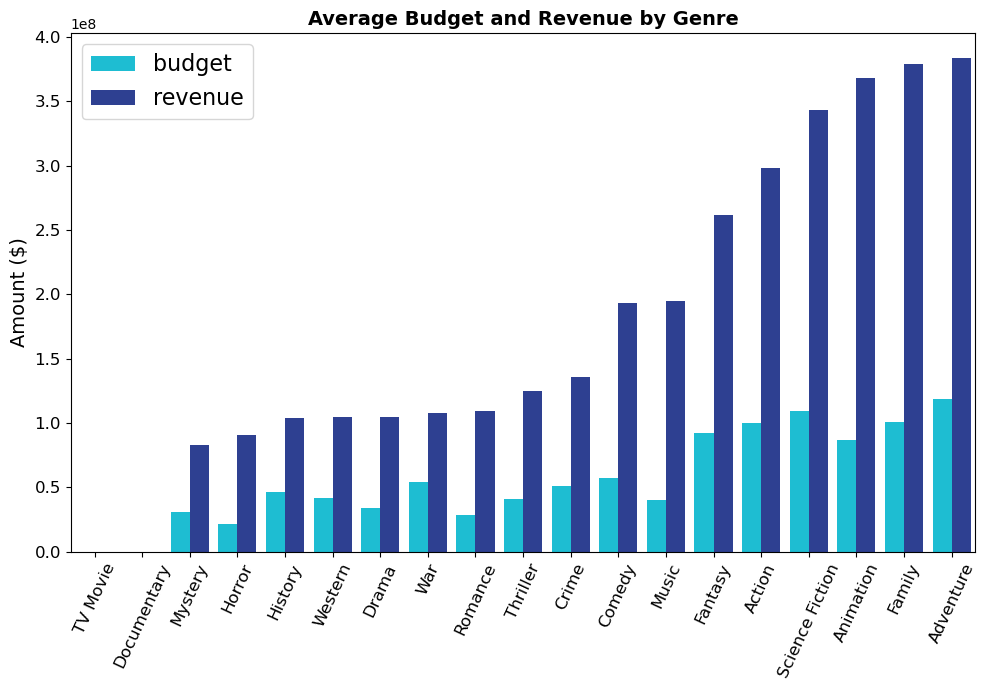

In [12]:
# import colors from powerpoint
dark_blue = "#1e35a1"
light_blue = "#00d4f0"

# create linecharts to compare avg budget and revenue by each genre
plt.figure(figsize=(10,7))
sns.barplot(data=genre_names, x='movie_genres', y='amount',hue='type',palette={"budget": light_blue, "revenue": dark_blue} )

# label and organize visualization
plt.title("Average Budget and Revenue by Genre", fontsize=14,fontweight = 'bold')
plt.ylabel("Amount ($)",fontsize=14)
plt.xlabel("")
plt.xticks(rotation=65,fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('../assets/Average Budget and Revenue by Genre.png', dpi = 150);
plt.show();

3.What is the average profit margin (revenue - budget) across genres or years?

> ## Average Profit Margin Across Year
>
> 
> Below, we create a **boxplot visualization** to show average profit throughout the decade. Boxplots are a wonderful tool when gathering many different **descriptive statistics** all at once. From this information we can see outliers, median, inner-quartile range and can truly uncover the distribution in profit. We have added a simple barchart below to show the **top five profitable genres** in our dataset.
> 
>
>* Examine top five profitable genres.
>* Further interpret distribution in **profit** throughout last decade.
>* Explore profitable genres.
>
> 

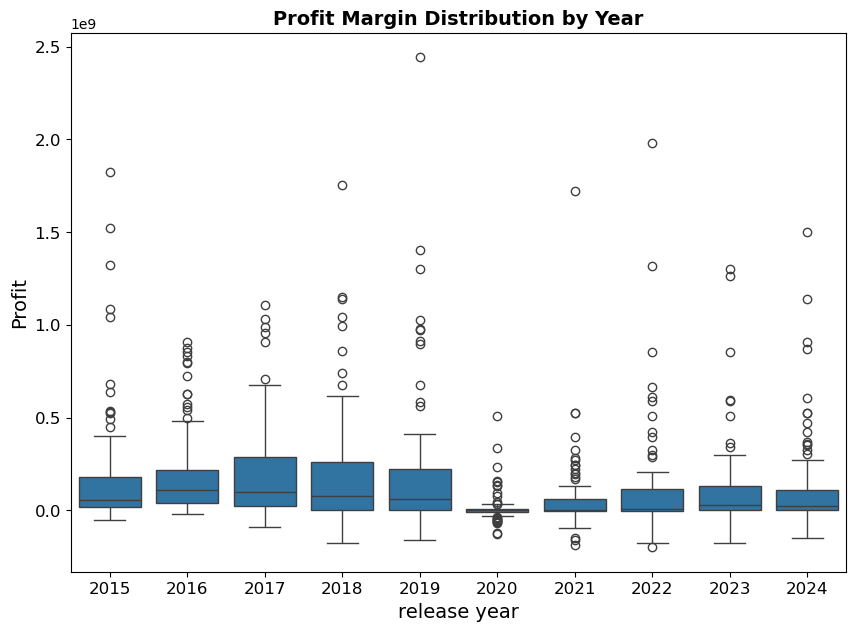

In [13]:
# calculate the profit margin for each movie
movies_2015_2024['profit margin'] = movies_2015_2024['revenue']-movies_2015_2024['budget']
movies_2015_2024.head()

# create a boxplot to compare profit margins across years
plt.figure(figsize=(10,7))
sns.boxplot(data = movies_2015_2024, x= 'release_year', y = 'profit margin')
plt.title("Profit Margin Distribution by Year",fontsize= 14,fontweight = 'bold')
plt.xlabel("release year",fontsize= 14)
plt.ylabel("Profit",fontsize= 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../assets/Profit Margin Distribution by Year.png', dpi = 150);

# display the plot
plt.show()

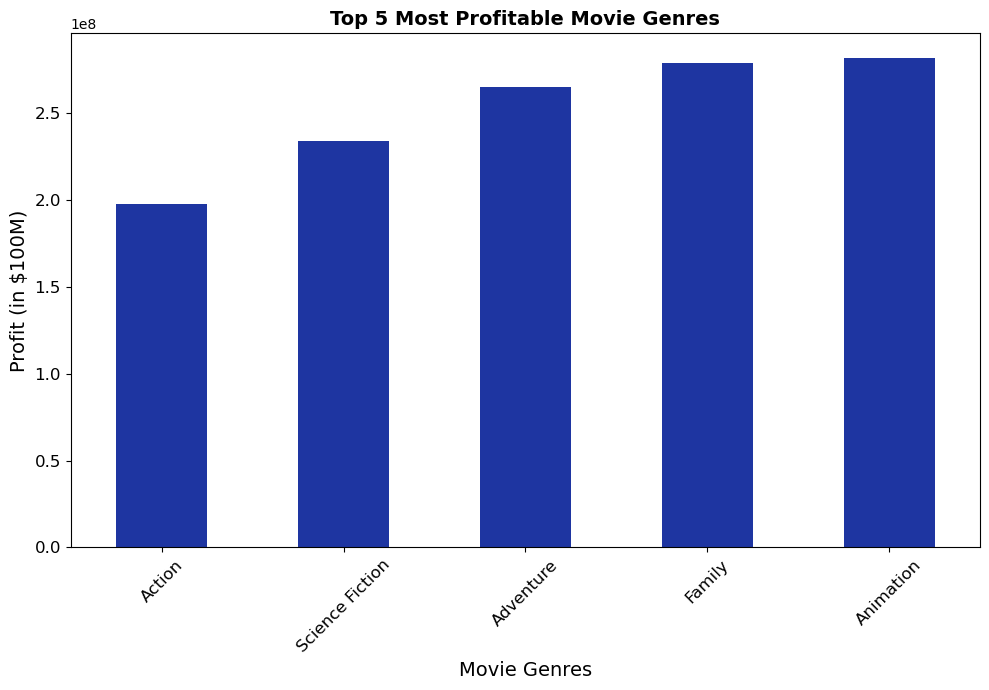

In [14]:
# import colors from powerpoint
dark_blue = "#1e35a1"
light_blue = "#00d4f0"

#calculate the profit margin for each movie
movies_2015_2024_explode['profit margin'] = movies_2015_2024_explode['revenue']-movies_2015_2024_explode['budget']

# group by movie genres and calculate avg profit margin and sort the values in ascending order
movies_2015_2024_profit=movies_2015_2024_explode.groupby('movie_genres')['profit margin'].mean().sort_values()
plt.figure(figsize=(10,7))

# plot average profit margin by genre as a bar chart
movies_2015_2024_profit.tail().plot(kind="bar", color=dark_blue)
plt.title ("Top 5 Most Profitable Movie Genres",fontsize=14,fontweight = 'bold')

# add title and axis labels
plt.xlabel('Movie Genres',fontsize=14)
plt.ylabel('Profit (in $100M)',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('../assets/Top 5 Most Profitable Movie Genres.png', dpi = 150);

# display the plot
plt.show();

> ## Ratings and Box-Office Preformance
>
> 
> Do movie ratings play a **significant role** in box office preformance? If these two variables are correlated we should observe a pattern in our scatterplot. Below, we fit a line to our scatterplot to examine this trend. It appears the outliers are too extreme and varied to indicate a **linear trend.**
>
> 
>* No strong **linear relationship.**
>* Profit is extremely variable regardless of rating.
>* High rating do not garauntee **financial success.**
>
> 


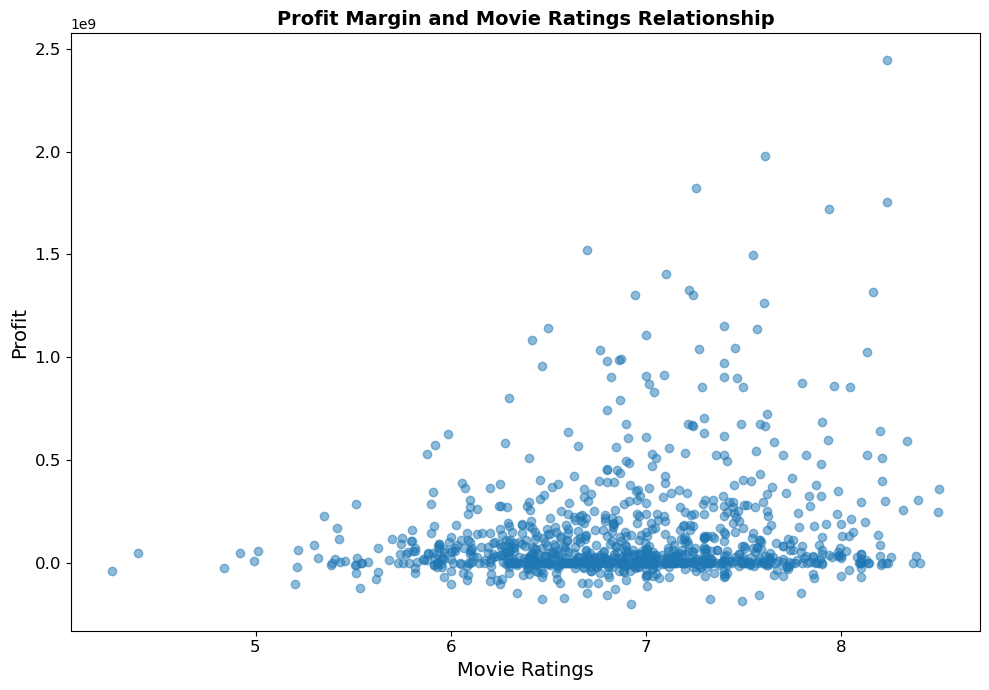

In [20]:
# scatter plot showing relationship between movie ratings and profit margin
plt.figure(figsize=(10,7))
plt.scatter(data = movies_2015_2024, x='vote_average', y = 'profit margin', alpha=0.5)

# add title and axis labels
plt.title("Profit Margin and Movie Ratings Relationship",fontsize = 14,fontweight = 'bold')
plt.xlabel("Movie Ratings",fontsize=14)
plt.ylabel("Profit", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('../assets/Box Office Performance and Movie Ratings Relationship', dpi = 150);

# display the plot
plt.show();

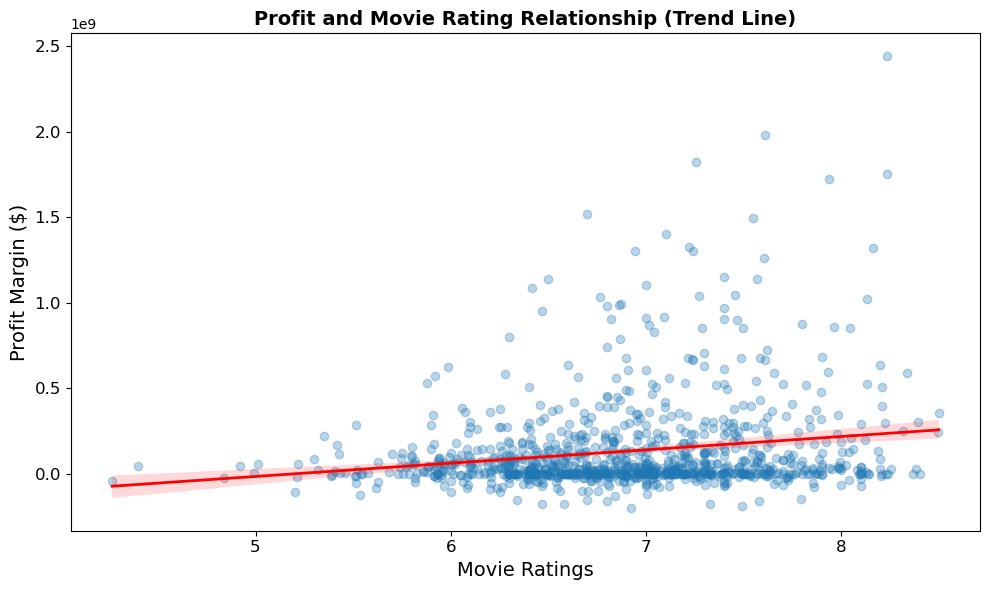

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=movies_2015_2024,
    x='vote_average',
    y='profit margin',
    scatter_kws={'alpha':0.3},  
    # trend line style
    line_kws={'color':'red', 'linewidth':2}  
)
plt.title("Profit and Movie Rating Relationship (Trend Line)",fontsize=14,fontweight = 'bold')
plt.xlabel("Movie Ratings",fontsize=14)
plt.ylabel("Profit Margin ($)",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('../assets/Profit Margin vs Movie Ratings with Trend Line.png', dpi = 150);
plt.show()